## Computing Mathematics II - Assignment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy

## Loading and Cleaning

In [2]:
df = pd.read_csv("harga-rumah-teres-mengikut-negeri.csv")
df = df.dropna()
columns = list(df.columns)[2:]

# Remove commas to enable conversion to integer
for column in columns:
    curr = df[column]
    for row in curr:
        df[column] = df[column].replace(row,row.replace(",",""))

# Convert to integer
for column in columns:
    df[column] = pd.to_numeric(df[column])

print(df.dtypes)
df

Tahun              float64
Quarter             object
Malaysia             int64
Kuala Lumpur         int64
Selangor             int64
Johor                int64
Pulau Pinang         int64
Negeri Sembilan      int64
Perak                int64
Melaka               int64
Kedah                int64
Pahang               int64
Terengganu           int64
Kelantan             int64
Perlis               int64
Sabah                int64
Sarawak              int64
dtype: object


,Tahun,Quarter,Malaysia,Kuala Lumpur,Selangor,Johor,Pulau Pinang,Negeri Sembilan,Perak,Melaka,Kedah,Pahang,Terengganu,Kelantan,Perlis,Sabah,Sarawak
0,2009.0,Q1,172036,349857,212860,140992,244082,104924,101046,86222,94774,122338,98141,98464,76963,219752,195590
1,2009.0,Q2,175808,349087,219963,143912,255146,108396,98375,86500,96829,126451,98731,108736,81461,223999,195785
2,2009.0,Q3,179409,364146,226059,146453,263807,106508,98996,91309,97005,124453,104921,112986,86901,229333,184626
3,2009.0,Q4,178402,369807,230847,125652,261951,106249,102311,88931,98075,122338,107030,117508,90713,237169,197268
4,2010.0,Q1,178880,354521,233516,127928,261708,108152,101128,87102,100183,124740,105609,115352,86340,250038,190388
5,2010.0,Q2,189412,393730,245457,144630,271364,108821,103156,91774,103963,129889,113865,112098,87425,252735,193344
6,2010.0,Q3,191055,385976,252272,138311,273868,110340,105240,94906,103543,129115,111458,126504,95129,253849,203589
7,2010.0,Q4,193481,391263,261917,133292,278959,116783,107243,94264,105077,129746,118935,124809,87425,259720,213663
8,2011.0,Q1,199318,404590,268302,136057,278963,124792,111923,93704,103902,136050,114800,135099,94869,259363,209942
9,2011.0,Q2,205378,453322,281136,134527,298784,120836,113961,96257,114157,132467,127672,129069,98433,271758,202696


## Terrace House Average Prices (Malaysia) from 2009 - 2018

Average Terrace House Prices Per Year:
2009 : 176413.75
2010 : 188207.0
2011 : 207702.25
2012 : 234933.75
2013 : 256910.25
2014 : 284135.5
2015 : 303826.0
2016 : 326445.5
2017 : 355647.5
2018 : 371568.0


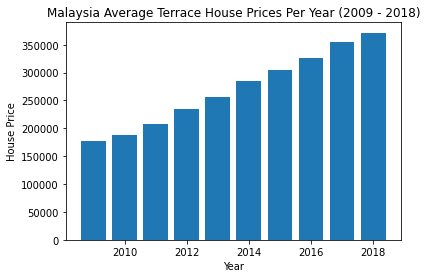

In [3]:
years = sorted(set(df["Tahun"].astype("int32")))
my_averages = {}

# Calculate Average Per Year Based on 4 Quarters
for year in years:
    my_averages[year] = df[df["Tahun"] == year]["Malaysia"].mean()

print("Average Terrace House Prices Per Year:")
for key in my_averages:
    print(f'{key} : {my_averages[key]}')

# Average Rate Calculation (Unused)
# rates = np.array([0])
# for i in range(2010, 2019):
#     yearly_rate = (my_averages[i] - my_averages[i-1]) / my_averages[i-1]
#     rates = np.append(rates, yearly_rate)

# print("Average House Price Change:", np.mean(rates))

plt.bar(years, my_averages.values())
plt.title("Malaysia Average Terrace House Prices Per Year (2009 - 2018)")
plt.xlabel("Year")
plt.ylabel("House Price")
plt.show()

## Least Square Method to Find the Best Fitted Linear Line (Malaysia)
The least square method was computed using the following formula:

<img src="https://i.ytimg.com/vi/EnNH3SxyZEI/maxresdefault.jpg" width="400px">

This obtains the slope and the y-intersect of the least square regression line.

Least Square Regression Line: y = 22764.181818181823x + 168140.13181818172
Years Since 2009: 0 	| Fitted Price of House: 168140.13181818172 	| Percentage Difference: -4.69
Years Since 2009: 1 	| Fitted Price of House: 190904.31363636354 	| Percentage Difference: 1.43
Years Since 2009: 2 	| Fitted Price of House: 213668.49545454537 	| Percentage Difference: 2.87
Years Since 2009: 3 	| Fitted Price of House: 236432.6772727272 	| Percentage Difference: 0.64
Years Since 2009: 4 	| Fitted Price of House: 259196.859090909 	| Percentage Difference: 0.89
Years Since 2009: 5 	| Fitted Price of House: 281961.04090909084 	| Percentage Difference: -0.77
Years Since 2009: 6 	| Fitted Price of House: 304725.22272727266 	| Percentage Difference: 0.3
Years Since 2009: 7 	| Fitted Price of House: 327489.4045454545 	| Percentage Difference: 0.32
Years Since 2009: 8 	| Fitted Price of House: 350253.5863636363 	| Percentage Difference: -1.52
Years Since 2009: 9 	| Fitted Price of House: 373017.76818181813

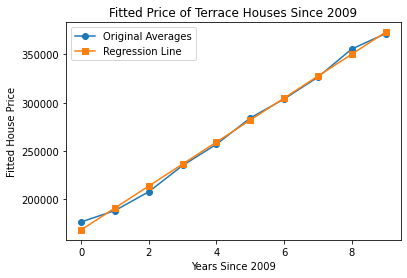

In [4]:
years_since = np.array([i for i in range(0,10)])
prices_only = np.array([[i] for i in list(my_averages.values())])

A = np.vstack((years_since, np.ones((1,10), dtype='int32'))).transpose()
x = np.dot(np.linalg.inv(np.dot(np.transpose(A), A)), np.dot(np.transpose(A), prices_only))

regression_line = f"y = {x[0][0]}x + {x[1][0]}"
print(f"Least Square Regression Line: {regression_line}")

fit_y = [(i*x[0][0] + x[1][0]) for i in range(0,10)]

for i in range(0, 10):
    perc_diff = (fit_y[i] - prices_only[i][0]) / prices_only[i][0] * 100
    print(f"Years Since 2009: {i} \t| Fitted Price of House: {fit_y[i]} \t| Percentage Difference: {round(perc_diff,2)}")

plt.plot(years_since, my_averages.values(), marker="o", label="Original Averages")
plt.plot(years_since, fit_y, marker="s", label="Regression Line")
plt.title("Fitted Price of Terrace Houses Since 2009")
plt.xlabel("Years Since 2009")
plt.ylabel("Fitted House Price")
plt.legend()
plt.show()

## Repeating the Steps to Calculate for All Other Regions

In [5]:
all_data = []
years_since = np.array([i for i in range(0,10)])

x = sympy.Symbol("x")

for region in columns:
    region_averages = np.array([])
    for year in years:
        region_averages = np.append(region_averages, df[df["Tahun"] == year][region].mean())

    A = np.vstack((years_since, np.ones((1,10), dtype='int32'))).transpose()
    coef = np.dot(np.linalg.inv(np.dot(np.transpose(A), A)), np.dot(np.transpose(A), region_averages))

    regression_line = coef[0]*x + coef[1]
    all_data.append([region, regression_line])

all_equations = pd.DataFrame(all_data, columns=["Region", "Regression Line"])
all_equations

,Region,Regression Line
0,Malaysia,22764.1818181818*x + 168140.131818182
1,Kuala Lumpur,57734.9409090909*x + 336246.690909091
2,Selangor,32319.8681818182*x + 217407.018181818
3,Johor,18842.9060606061*x + 115470.222727273
4,Pulau Pinang,26936.203030303*x + 254458.786363636
5,Negeri Sembilan,12965.5681818182*x + 98350.1181818182
6,Perak,10124.9666666667*x + 96833.5
7,Melaka,7465.8696969697*x + 83019.2863636364
8,Kedah,7163.77272727272*x + 95410.7227272727
9,Pahang,11854.5257575758*x + 122448.959090909


## Prediction of Montly Percentage Savings Required 
Given that the graduate wants to purchase a house after 5 years of working, how many percent do they need to save monthly specifically to obtain the 10% downpayment after 5 years. (Taking the average Malaysia price)

Note that:
- The salary of the graduate rises each year. (Using the assumption of a 7.5% increase each year)
- In this case, the price of the house would be RM555131.12, leading the downpayment after the 5th year = RM55513.12

The aim here would be to ensure that the sum of the graduate's savings after the 5 years (Geometric progression sum where the ratio is the rate of increase of the graduate's salary) is more than or equal to this downpayment.

Through the calculation below, it can be found that the graduate has to save more than 32.8% of his salary per month.

In [11]:
n = sympy.Symbol("n")

malaysia_line = all_equations[all_equations["Region"] == "Malaysia"]["Regression Line"][0]
prediction_val = malaysia_line.subs(x,17)

exp = (2424*n*12*(1.075**5-1))/(0.075)
eq = (2424*n*12*(1.075**5-1))/(0.075) >= 0.1*prediction_val

print(sympy.solve(eq, n))

proof = exp.subs([(n,0.329)])
print(f"By saving {0.329*100}%, the graduate will have RM{proof} which is higher than the downpayment required.")

(0.328568517242292 <= n) & (n < oo)
By saving 32.9%, the graduate will have RM55586.0232167625 which is higher than the downpayment required.


## Prediction of Years Required with a Fixed Percentage of Savings
Given that instead, the graduate saves 10% of their salary each month and wants to know how long it will take to obtain the 10% downpayment. (Taking the average Malaysia price)

Note that:
- In this case, the house price is constantly increasing and so does it's downpayment.
    - Since the regression line is based on the number of years since 2009, the modified equation for the downpayment = 0.1\*(22764.18181818\*(12+n) + 168140.13181818) where:
    - 0.1 = downpayment rate
    - 12 = 2021 - 2009, assuming 2021 is the year the graduate begins working (this can also be changed)
    - n is the number of years since the graduate starts working.
- At the same time, how much the graduate earns monthly is also changing each here.
- Hence, here we have two moving variables.

Due to the nature of the equation, sympy is unable to solve this and hence a simple while loop is used instead. The result is that the student would have enough savings after 16 years since 2021 with 10% savings. This is more clearly shown in the graphs.

In [7]:
n = sympy.Symbol("n")
savings_exp = (2424*0.1*12*(1.075**n-1))/(0.075)
downpayment_exp = 0.1*(22764.18181818*(12+n) + 168140.13181818)

i = 1
while True:
    lhs = savings_exp.subs(n,i)
    rhs = downpayment_exp.subs(n,i)

    if lhs >= rhs:
        break

    i += 1

print(f"With 10% savings, the graduate will have RM{savings_exp.subs(n,i)} after {i} years since 2021.")
print(f"Downpayment would cost RM{downpayment_exp.subs(n,i)} after {i} years since 2021.")

With 10% savings, the graduate will have RM84579.8816952155 after 16 years since 2021.
Downpayment would cost RM80553.7222727220 after 16 years since 2021.


## Graphing
This first situation is for when savings percentage is fixed (10%) and the number of years is to be calculated. This also takes the average house price in Malaysia as its prediction equation.

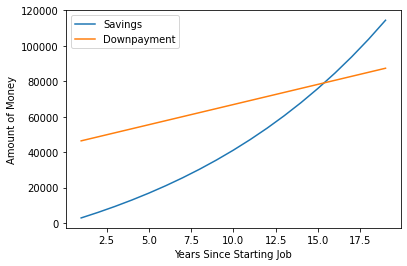

In [8]:
x_val = [i for i in range(1,20)]

savings_vals = [(2424*0.1*12*((1.075**i)-1))/(0.075) for i in x_val]
downpayment_vals = [0.1*(22764.18181818*(12+i) + 168140.13181818) for i in x_val]

plt.plot(x_val, savings_vals, label="Savings")
plt.plot(x_val, downpayment_vals, label="Downpayment")

plt.ylabel("Amount of Money")
plt.xlabel("Years Since Starting Job")
plt.legend()
plt.show()